# Loading standard libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We will study penguins dataset that comes with seaborn.

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Our data contains categorical data. We can not give it to predictors, so we need to convert them to numeric data with pandas.get_dummies() function 

In [4]:
penguins.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [5]:
peng_cp = penguins.copy()

# Get dummy values for "island column".

In [6]:
island_dummy = pd.get_dummies(peng_cp.island, dtype=float)

In [7]:
island_dummy.head()

,Biscoe,Dream,Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


## Dropping "island" column from our dataset.

In [8]:
peng_cp.drop(columns="island", inplace=True)

## Connecting "island_dummy" column with our data.

In [9]:
peng_cp = pd.concat([peng_cp, island_dummy], axis=1)

## The result of concat function show below. Our dataset now contains numerical information for island column.

In [10]:
peng_cp.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,Female,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,Female,0.0,0.0,1.0
3,Adelie,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,Female,0.0,0.0,1.0


## We also need to convert "sex" column to numerical value as well. We can directly assign our sex column to dummy variable by dropping first.

In [11]:
peng_cp.sex = pd.get_dummies(peng_cp["sex"], drop_first=True, dtype=float)

## The final result is:

In [12]:
peng_cp.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0
3,Adelie,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0


# The next step is handling null values. First we need to check columns to see how many null value they contain.

In [13]:
peng_cp.isnull().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
Biscoe               0
Dream                0
Torgersen            0
dtype: int64

## In this example, I dropped null rows. Because null values are in numerical columns, we can use different methods like assign to mean.

In [14]:
peng_cp.dropna(inplace=True)

In [15]:
peng_cp.isnull().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
Biscoe               0
Dream                0
Torgersen            0
dtype: int64

# The first machine learning model that we use is K-Nearest Neighbors. 

### We import model. Also we need to import train_test_split for basic cross-validation. Also classification_report imported to see how our model performed.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.metrics import classification_report

### We assign X to predictors.

In [19]:
X = peng_cp.drop("species", axis=1)

### We assigned Y to "species" to predict species.

In [20]:
y = peng_cp["species"]

In [21]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,1.0


In [22]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

### Now we used train_test_split to use some of data as train and rest as test. For this example, test_size is 0.25. Random state used for cross-validation. 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=153)

### The K-Nearest Neighbor model takes different number of K values. We used 3 different K value to compare how the model performs in different number of K.

In [24]:
reg_K_2 = KNeighborsClassifier(n_neighbors=2)

In [25]:
reg_K_10 = KNeighborsClassifier(n_neighbors=10)

In [26]:
reg_K_30 = KNeighborsClassifier(n_neighbors=30)

### The next step is preparing model with using fit() function. X_train and y_train used for model evaluation.

In [27]:
reg_K_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [28]:
reg_K_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
reg_K_30.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### Now we predict y values (species) with different fit.

In [30]:
y_pred_k2 = reg_K_2.predict(X_test)

In [31]:
y_pred_k10 = reg_K_10.predict(X_test)

In [32]:
y_pred_k30 = reg_K_30.predict(X_test)

## After prediction, now it is time to see how our model performed. First we looking at classification report for each model.

In [33]:
print(classification_report(y_test, y_pred_k2))

              precision    recall  f1-score   support

      Adelie       0.78      0.89      0.83        44
   Chinstrap       0.55      0.43      0.48        14
      Gentoo       0.96      0.86      0.91        28

    accuracy                           0.80        86
   macro avg       0.76      0.72      0.74        86
weighted avg       0.80      0.80      0.80        86



In [34]:
print(classification_report(y_test, y_pred_k10))

              precision    recall  f1-score   support

      Adelie       0.76      0.93      0.84        44
   Chinstrap       1.00      0.14      0.25        14
      Gentoo       0.87      0.93      0.90        28

    accuracy                           0.80        86
   macro avg       0.88      0.67      0.66        86
weighted avg       0.83      0.80      0.76        86



In [35]:
print(classification_report(y_test, y_pred_k30))

              precision    recall  f1-score   support

      Adelie       0.73      0.91      0.81        44
   Chinstrap       1.00      0.07      0.13        14
      Gentoo       0.83      0.89      0.86        28

    accuracy                           0.77        86
   macro avg       0.85      0.62      0.60        86
weighted avg       0.81      0.77      0.72        86



### As a result of each report, we see that increasing K value did not change precision of model, on the contrary it decreased recall value for "Chinstrap" significantly. Which indicates (true positives) / (all values model says positive). Our model has failed to distinguish "Chinstrap" species.

## The next step is using confusion matrix to see how our model prediction vs true values compared.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test, y_pred_k2))

[[39  4  1]
 [ 8  6  0]
 [ 3  1 24]]


In [38]:
print(confusion_matrix(y_test, y_pred_k10))

[[41  0  3]
 [11  2  1]
 [ 2  0 26]]


In [39]:
print(confusion_matrix(y_test, y_pred_k30))

[[40  0  4]
 [12  1  1]
 [ 3  0 25]]


### The problem is "Chinstrap" species as well. But seeing it directly is not easy, we need to use graphs.

### We created plot function to see graphical display of our data.

In [40]:
def plot_func(conf_matrix, label):
    species_names = label.unique()

# Plot confusion matrix with species labels
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species_names, yticklabels=species_names)
    plt.ylabel('Predicted Species')
    plt.xlabel('True Species')
    plt.title('Confusion Matrix')
    plt.show()

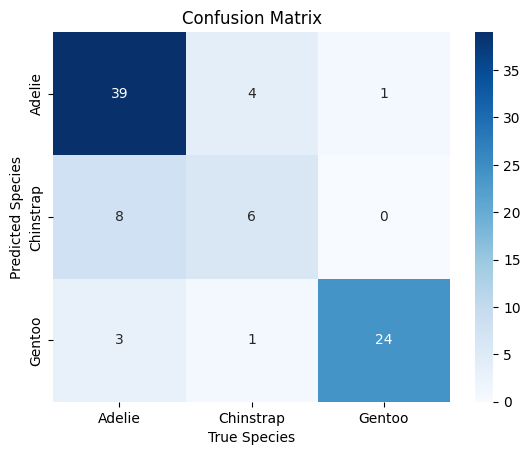

In [41]:
conf_matrix_k2 = confusion_matrix(y_test, y_pred_k2)
plot_func(conf_matrix=conf_matrix_k2, label=penguins["species"])

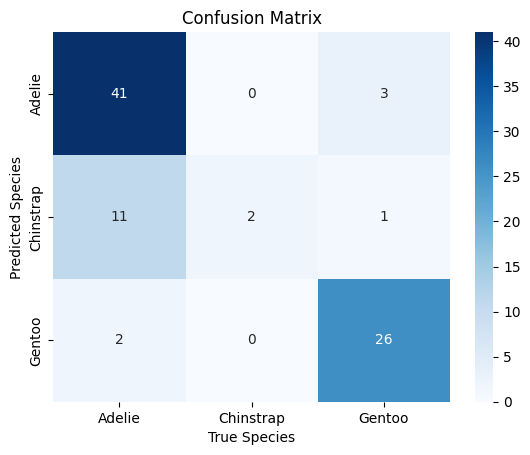

In [42]:
conf_matrix_k10 = confusion_matrix(y_test, y_pred_k10)
plot_func(conf_matrix_k10, penguins["species"])

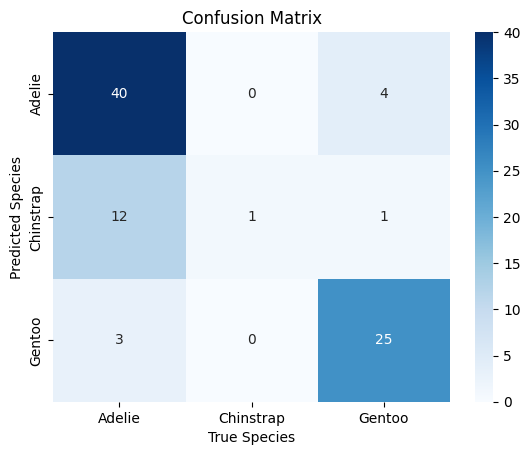

In [43]:
conf_matrix_k30 = confusion_matrix(y_test, y_pred_k30)
plot_func(conf_matrix_k30, penguins["species"])

## The result is K-Nearest Neighbor algorithm performed well on "Adelie" and "Gentoo" species but distinguish between "Adelie" and "Chinstrap" is problem for KNN algorithm.

# Linear Discriminant Analysis(LDA)

## Because KNN not performed well, now we used different algorithm: Linear Discriminant Analysis.

### We start with importing LinearDiscriminantAnalysis function from sklearn.discriminant_analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
reg_lda = LinearDiscriminantAnalysis()

## We fit our model to train data and predicted y.

In [46]:
reg_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [47]:
y_pred_lda = reg_lda.predict(X_test)

### We get report from classification report.

In [48]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        28

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



## We see that our model gets 100% accuracy for all groups, this means that for penguins dataset, LDA is much better approach. 

In [49]:
print(confusion_matrix(y_test, y_pred_lda))

[[44  0  0]
 [ 0 14  0]
 [ 0  0 28]]


## Graphical Display of confusion matrix.

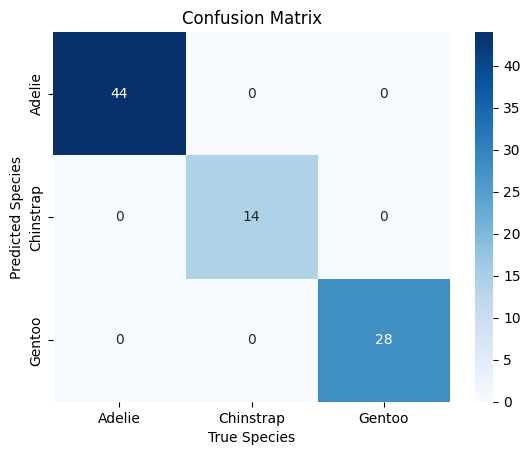

In [50]:
plot_func(confusion_matrix(y_test, y_pred_lda), penguins["species"])

# Naive Bayes

## The last model for comparison is Naive Bayes.

### We start with Gaussian Naive Bayes. It is using normal distribution and maximum likelihood for grouping.

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
reg_gnb = GaussianNB()

In [53]:
reg_gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred_gnb = reg_gnb.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

      Adelie       1.00      0.64      0.78        44
   Chinstrap       0.48      1.00      0.65        14
      Gentoo       0.97      1.00      0.98        28

    accuracy                           0.81        86
   macro avg       0.82      0.88      0.80        86
weighted avg       0.90      0.81      0.82        86



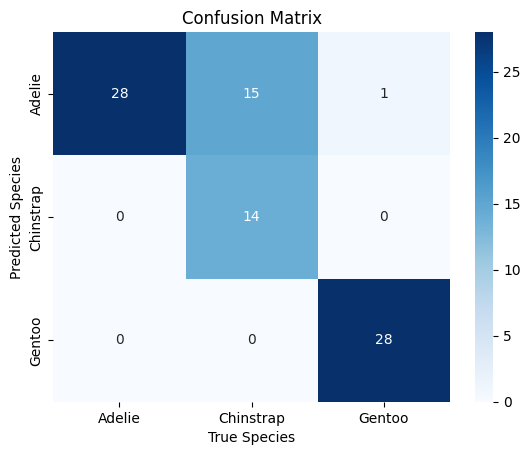

In [56]:
plot_func(confusion_matrix(y_test, y_pred_gnb), penguins["species"])

## Gaussian Naive Bayes worked perfectly for "Gentoo" and "Chinstrap" species but distinguish between "Adelie" and "Chinstrap" is problem.

## Now we are using Multinomial Naive Bayes, which is different algorithm for Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
reg_mnb = MultinomialNB()

In [59]:
reg_mnb.fit(X_train, y_train)

MultinomialNB()

In [60]:
y_pred_mnb = reg_mnb.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

      Adelie       0.97      0.70      0.82        44
   Chinstrap       0.62      0.93      0.74        14
      Gentoo       0.85      1.00      0.92        28

    accuracy                           0.84        86
   macro avg       0.81      0.88      0.83        86
weighted avg       0.87      0.84      0.84        86



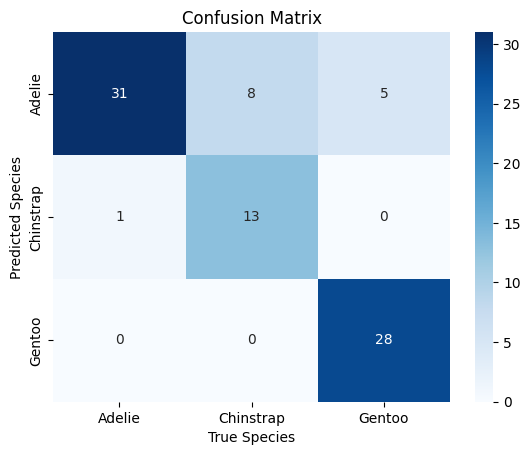

In [62]:
plot_func(confusion_matrix(y_test, y_pred_mnb), penguins["species"])

## For Naive Bayes, it generally performed well. Gaussian Naive Bayes gave better result for penguins dataset.

# To sum up all work, Linear Discriminant Analysis performed better for grouping penguin species. Other machine learning models gave some problems distinguishing species.